In [1]:
'''Forma para plantear el problema de los NaN's para las estadísticas de jugadores.
Modelo de regresión lineal que predice las estadísticas en función de los puntos de ranking.'''

"Forma para plantear el problema de los NaN's para las estadísticas de jugadores.\nModelo de regresión lineal que predice las estadísticas en función de los puntos de ranking."

In [1]:
from players_stats import get_stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_1 = pd.read_csv('atp_matches_2023.csv')
dataset_1.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


In [3]:
dataset = pd.read_csv('atp_matches_qual_chall_2023.csv')
dataset.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-2843,Adelaide 1,Hard,32,A,20230102,238,126952,1.0,NaN,...,78.0,57.0,23.0,17.0,1.0,1.0,83.0,630.0,92.0,594.0
1,2023-2843,Adelaide 1,Hard,32,A,20230102,237,200615,NaN,NaN,...,80.0,54.0,14.0,16.0,2.0,6.0,120.0,469.0,116.0,488.0
2,2023-2843,Adelaide 1,Hard,32,A,20230102,236,126128,3.0,NaN,...,46.0,31.0,25.0,14.0,7.0,11.0,88.0,606.0,98.0,570.0
3,2023-2843,Adelaide 1,Hard,32,A,20230102,235,208014,NaN,WC,...,40.0,30.0,18.0,11.0,6.0,9.0,164.0,344.0,155.0,363.0
4,2023-2843,Adelaide 1,Hard,32,A,20230102,234,126952,1.0,NaN,...,32.0,15.0,9.0,8.0,4.0,9.0,83.0,630.0,102.0,561.0


In [4]:
dataset_r = pd.read_csv('atp_rankings_20s.csv')
dataset_r.head()

,ranking_date,rank,player,points
0,20200106,1,104745,9985
1,20200106,2,104925,9055
2,20200106,3,103819,6590
3,20200106,4,106233,5825
4,20200106,5,106421,5705


In [5]:
# Asegurarse de que 'player' y 'points' son del tipo correcto
dataset_r['player'] = dataset_r['player'].astype(int)
dataset_r['points'] = dataset_r['points'].astype(float)

# Agrupar por 'player' y calcular la media de 'points'
media_puntos = dataset_r.groupby('player')['points'].mean()

# Convertir la Serie resultante en un DataFrame
df_media_puntos = media_puntos.reset_index()

# Renombrar las columnas
df_media_puntos.columns = ['jugador', 'media_puntos']

In [6]:
df_stats = get_stats(dataset)

In [7]:
# Convertir las claves del diccionario a un conjunto para una búsqueda más rápida
jugadores_en_stats = set(df_stats.keys())

# Filtrar df_media_puntos
df_media_puntos = df_media_puntos[df_media_puntos['jugador'].isin(jugadores_en_stats)]


### Estudiamos la correlación de Pearson

In [8]:
import numpy as np
from scipy.stats import pearsonr

# Tus datos
jugadores = df_media_puntos['jugador'].values
puntos_ranking = df_media_puntos['media_puntos'].values

# Inicializa listas vacías para almacenar las estadísticas de rendimiento y los puntos de ranking
vector = []
puntos = []

# Itera sobre cada jugador
for jugador in jugadores:
    # Si el jugador está en df_stats, agrega sus estadísticas y puntos al vector correspondiente
    if jugador in df_stats:
        vector.append(df_stats[jugador])
        puntos.append(puntos_ranking[jugadores == jugador][0])

# Convierte las listas a arrays de numpy
vector = np.array(vector)
puntos = np.array(puntos)

# Calcula el coeficiente de correlación de Pearson y el valor p para cada estadística
for i in range(vector.shape[1]):
    coef, p = pearsonr(vector[:, i], puntos)
    if p < 0.05:
        print(f'Coeficiente de correlación de Pearson para la estadística {i+1}:', coef)
        print('Valor p:', p)



Coeficiente de correlación de Pearson para la estadística 1: 0.09531516249254057
Valor p: 0.0006809764239233603
Coeficiente de correlación de Pearson para la estadística 2: 0.23139707314318342
Valor p: 7.310303847202312e-17
Coeficiente de correlación de Pearson para la estadística 3: 0.14332008151915193
Valor p: 3.0086725632242285e-07
Coeficiente de correlación de Pearson para la estadística 4: 0.30680214424031893
Valor p: 5.077157152634306e-29
Coeficiente de correlación de Pearson para la estadística 5: 0.25368669013988754
Valor p: 4.665154188742304e-20
Coeficiente de correlación de Pearson para la estadística 6: 0.14323348878138986
Valor p: 3.0589974784378943e-07


### Estudiamos la correlación de Spearman

In [9]:
from scipy.stats import spearmanr
# Calcula el coeficiente de correlación de Spearman y el valor p para cada estadística
for i in range(vector.shape[1]):
    coef, p = spearmanr(vector[:, i], puntos)
    if p < 0.05:
        print(f'Coeficiente de correlación de Spearman para la estadística {i+1}:', coef)
        print('Valor p:', p)

Coeficiente de correlación de Spearman para la estadística 1: 0.19495883681776427
Valor p: 2.5601397944616723e-12
Coeficiente de correlación de Spearman para la estadística 2: 0.3329455977552225
Valor p: 3.561070935084987e-34
Coeficiente de correlación de Spearman para la estadística 3: 0.22877241532746018
Valor p: 1.6560214459153325e-16
Coeficiente de correlación de Spearman para la estadística 4: 0.4876087176314569
Valor p: 1.2129786639450288e-76
Coeficiente de correlación de Spearman para la estadística 5: 0.45622054808304563
Valor p: 3.858615339008837e-66
Coeficiente de correlación de Spearman para la estadística 6: 0.21530408985069285
Valor p: 9.393678284305575e-15


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Crea y entrena el modelo de regresión polinomial

modelo = LinearRegression()
modelo.fit(puntos.reshape(-1, 1), vector)

# Ahora puedes usar el modelo para predecir las estadísticas de los jugadores basándote en los puntos medios en el ranking
vector_predicho = modelo.predict(puntos.reshape(-1, 1))

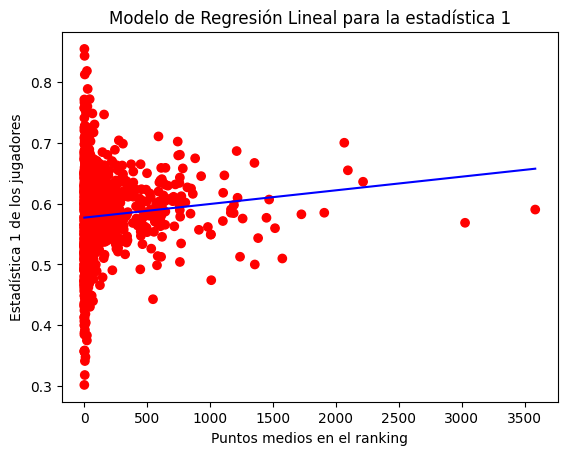

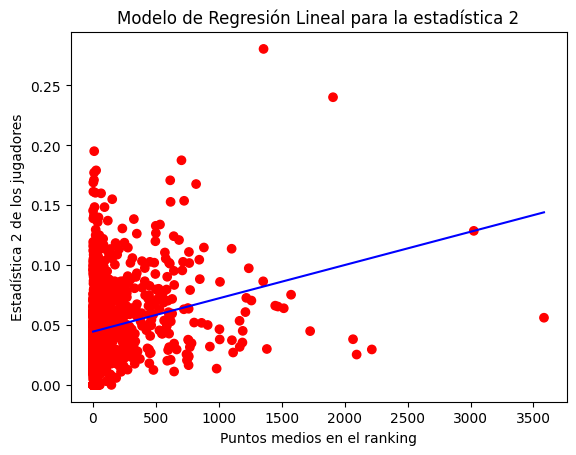

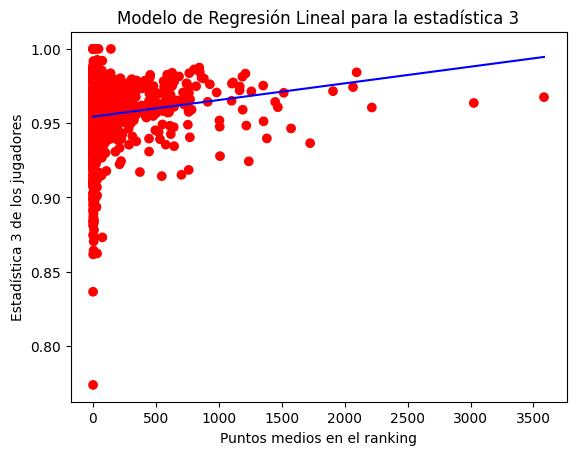

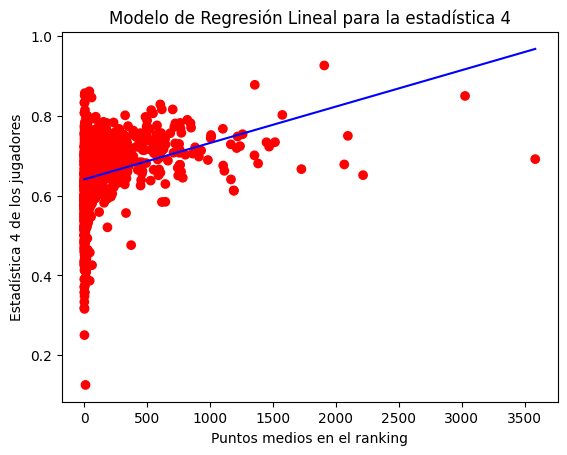

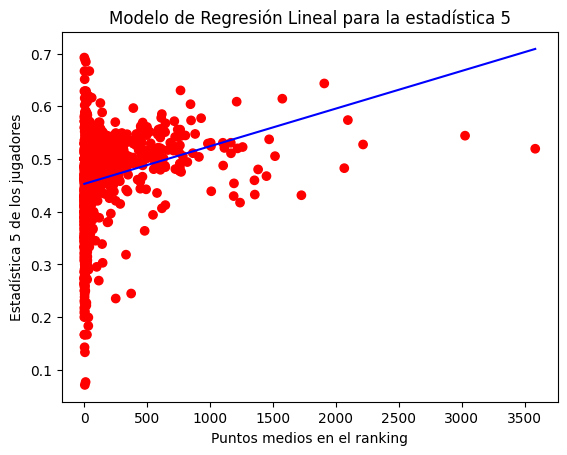

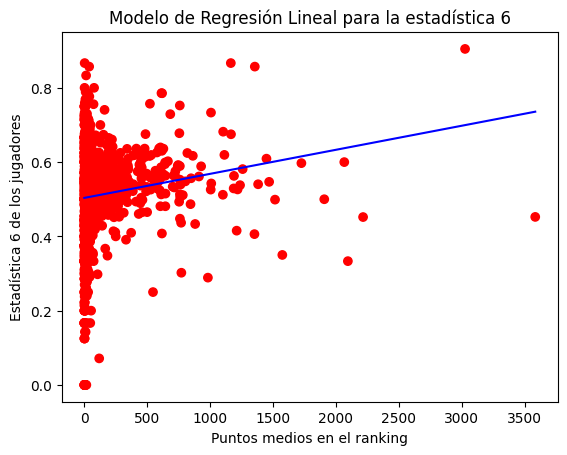

In [11]:
import matplotlib.pyplot as plt

# Crea una cuadrícula de valores para visualizar el modelo
puntos_grid = np.linspace(min(puntos), max(puntos), 100).reshape(-1, 1)

# Predice las estadísticas de los jugadores para la cuadrícula de valores
vector_predicho_grid = modelo.predict(puntos_grid)

# Crear una lista de colores basada en si el jugador está en df_stats
colores = ['red' if jugador in df_stats else 'green' for jugador in jugadores]

# Visualiza los datos y el modelo para cada estadística
for i in range(vector.shape[1]):
    plt.figure()  # crea una nueva figura
    plt.scatter(puntos, vector[:, i], color=colores)
    plt.plot(puntos_grid, vector_predicho_grid[:, i], color='blue')
    plt.title(f'Modelo de Regresión Lineal para la estadística {i+1}')
    plt.xlabel('Puntos medios en el ranking')
    plt.ylabel(f'Estadística {i+1} de los jugadores')
    plt.show()



In [12]:
len(df_stats)

1356